In [1]:
# Do not modify
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

from IPython.display import Image
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# inline plotting instead of popping out
%matplotlib inline

df = pd.read_csv(
    'http://archive.ics.uci.edu/ml/machine-learning-databases/00381/PRSA_data_2010.1.1-2014.12.31.csv',
    sep=',')
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [2]:
# Do not modify
df = df.drop(['cbwd'], axis=1)  # drop non-scalar feature
df = df.dropna(axis=0, how='any')  # drop samples who has nan feature
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,1.79,0,0
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,2.68,0,0
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,3.57,0,0
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,5.36,1,0
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,6.25,2,0


In [3]:
# Do not modify
idx = np.logical_or(
    np.logical_and(df['year'].values == 2014, df['month'].values < 3),
    np.logical_and(df['year'].values == 2013, df['month'].values == 12))
X = df.loc[idx].drop('pm2.5', axis=1)
y = df.loc[idx]['pm2.5'].values
X.head()

,No,year,month,day,hour,DEWP,TEMP,PRES,Iws,Is,Ir
34320,34321,2013,12,1,0,-13,-2.0,1026.0,0.89,0,0
34321,34322,2013,12,1,1,-14,-3.0,1025.0,3.13,0,0
34322,34323,2013,12,1,2,-13,-3.0,1025.0,0.89,0,0
34323,34324,2013,12,1,3,-13,-4.0,1025.0,0.89,0,0
34324,34325,2013,12,1,4,-13,-3.0,1025.0,1.78,0,0


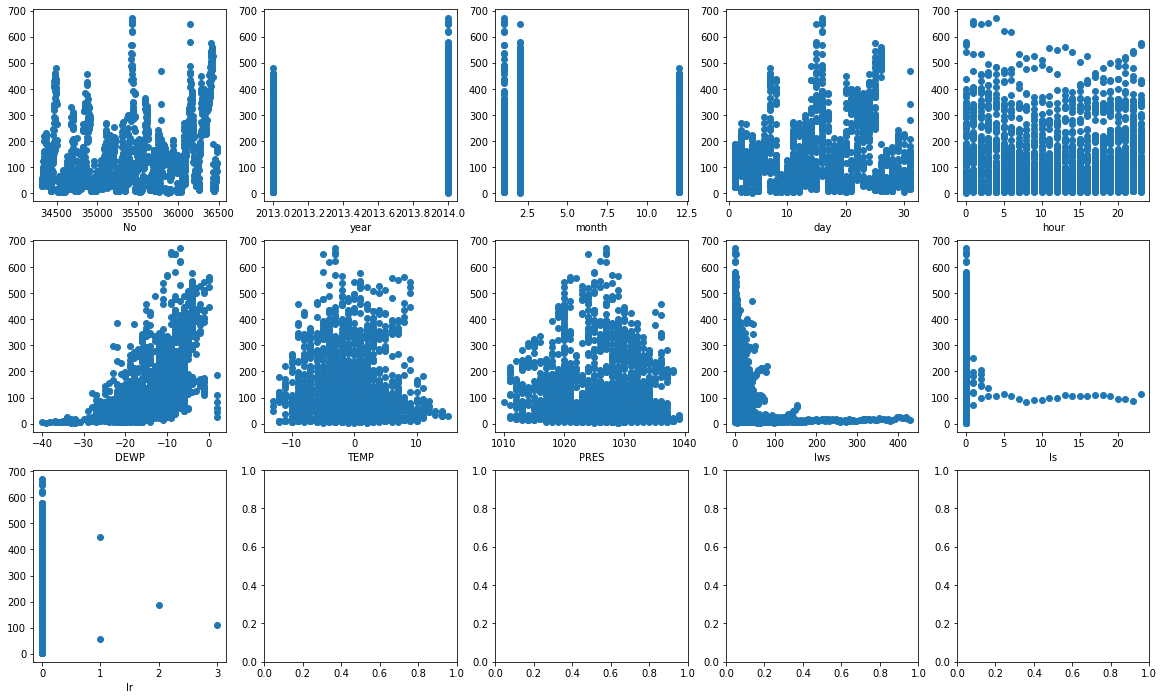

In [4]:
x_vars = X.columns.tolist()

_,subplot_arr = plt.subplots(3, 5, figsize=(20, 12))

for idx, x_var in enumerate(x_vars):
  x_idx = idx // 5
  y_idx = idx % 5
  subplot_arr[x_idx,y_idx].scatter(X[x_var],y)
  subplot_arr[x_idx,y_idx].set_xlabel(x_var)

plt.show()

First, assume that No is a useless feature.
Observe that DEWP has some relation with pm 2.5.
And there might be some relation between Iws and pm 2.5.


In [5]:
X_choose = X[['DEWP','Iws','day','hour','PRES']].values


X_train, X_test, y_train, y_test = train_test_split(
    X_choose, y, test_size=0.3, random_state=0)

print('#Training data points: %d' % X_train.shape[0])
print('#Testing data points: %d' % X_test.shape[0])

#Training data points: 1491
#Testing data points: 639


In [6]:
# Standardization
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


## Multivariate Linear Regression

In [7]:
# Training
slr = LinearRegression()
slr.fit(X_train_std, y_train)

# Testing
y_train_pred = slr.predict(X_train_std)
y_test_pred = slr.predict(X_test_std)

print('MSE train: %.2f, test: %.2f' %
      (mean_squared_error(y_train, y_train_pred),
       mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.2f, test: %.2f' % (r2_score(y_train, y_train_pred),
                                       r2_score(y_test, y_test_pred)))

MSE train: 8614.05, test: 9075.04
R^2 train: 0.46, test: 0.42


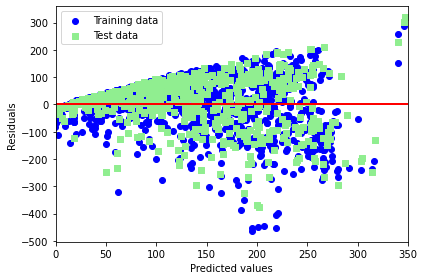

In [8]:
plt.scatter(
    y_train_pred,
    y_train_pred - y_train,
    c='blue',
    marker='o',
    label='Training data')
plt.scatter(
    y_test_pred,
    y_test_pred - y_test,
    c='lightgreen',
    marker='s',
    label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=350, lw=2, color='red')
plt.xlim([0, 350])
plt.tight_layout()
plt.show()

## Multivariate Polynomial Regression (degree2)

In [9]:
regr = LinearRegression()


quadratic = PolynomialFeatures(degree=2)
X_quad_train = quadratic.fit_transform(X_train_std)
X_quad_test = quadratic.fit_transform(X_test_std)
regr = regr.fit(X_quad_train, y_train)
y_train_pred = regr.predict(X_quad_train)
y_test_pred = regr.predict(X_quad_test)
print('MSE train: %.2f, test: %.2f' %
      (mean_squared_error(y_train, y_train_pred),
       mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.2f, test: %.2f' % (r2_score(y_train, y_train_pred),
                                       r2_score(y_test, y_test_pred)))

MSE train: 6386.89, test: 7134.46
R^2 train: 0.60, test: 0.54


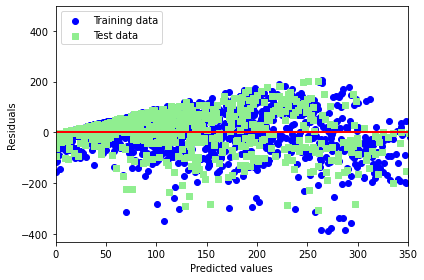

In [10]:
plt.scatter(
    y_train_pred,
    y_train_pred - y_train,
    c='blue',
    marker='o',
    label='Training data')
plt.scatter(
    y_test_pred,
    y_test_pred - y_test,
    c='lightgreen',
    marker='s',
    label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=350, lw=2, color='red')
plt.xlim([0, 350])
plt.tight_layout()
plt.show()

## Multivariate Polynomial Regression (degree3)

In [11]:
cubic = PolynomialFeatures(degree=3)
X_cubic_train = cubic.fit_transform(X_train_std)
X_cubic_test = cubic.fit_transform(X_test_std)
print('#Features: %d' % X_cubic_train.shape[1])
regr = regr.fit(X_cubic_train, y_train)
y_train_pred = regr.predict(X_cubic_train)
y_test_pred = regr.predict(X_cubic_test)
print('MSE train: %.2f, test: %.2f' %
      (mean_squared_error(y_train, y_train_pred),
       mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.2f, test: %.2f' % (r2_score(y_train, y_train_pred),
                                       r2_score(y_test, y_test_pred)))

#Features: 56
MSE train: 5380.25, test: 6299.76
R^2 train: 0.66, test: 0.60


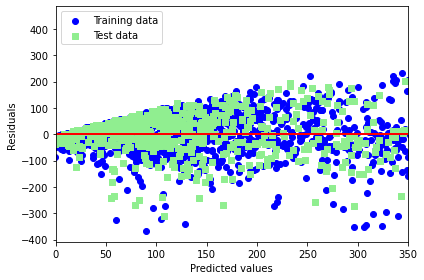

In [12]:
plt.scatter(
    y_train_pred,
    y_train_pred - y_train,
    c='blue',
    marker='o',
    label='Training data')
plt.scatter(
    y_test_pred,
    y_test_pred - y_test,
    c='lightgreen',
    marker='s',
    label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=350, lw=2, color='red')
plt.xlim([0, 350])
plt.tight_layout()
plt.show()

## Multivariate Polynomial Regression (degree4)

In [13]:
fourth_power = PolynomialFeatures(degree=4)
X_fourth_power_train = fourth_power.fit_transform(X_train_std)
X_fourth_power_test = fourth_power.fit_transform(X_test_std)
regr = regr.fit(X_fourth_power_train, y_train)
y_train_pred = regr.predict(X_fourth_power_train)
y_test_pred = regr.predict(X_fourth_power_test)
print('MSE train: %.2f, test: %.2f' %
      (mean_squared_error(y_train, y_train_pred),
       mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.2f, test: %.2f' % (r2_score(y_train, y_train_pred),
                                       r2_score(y_test, y_test_pred)))

MSE train: 4268.81, test: 5244.50
R^2 train: 0.73, test: 0.66


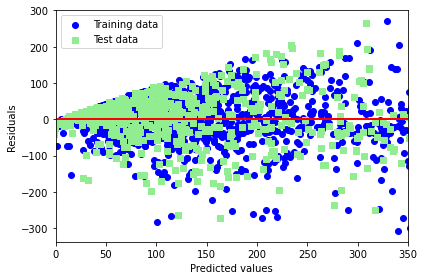

In [14]:
plt.scatter(
    y_train_pred,
    y_train_pred - y_train,
    c='blue',
    marker='o',
    label='Training data')
plt.scatter(
    y_test_pred,
    y_test_pred - y_test,
    c='lightgreen',
    marker='s',
    label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=350, lw=2, color='red')
plt.xlim([0, 350])
plt.tight_layout()
plt.show()

## Multivariate Polynomial Regression (degree5)

In [15]:
fifth_power = PolynomialFeatures(degree=5)
X_fifth_power_train = fifth_power.fit_transform(X_train_std)
X_fifth_power_test = fifth_power.fit_transform(X_test_std)
regr = regr.fit(X_fifth_power_train, y_train)
y_train_pred = regr.predict(X_fifth_power_train)
y_test_pred = regr.predict(X_fifth_power_test)
print('MSE train: %.2f, test: %.2f' %
      (mean_squared_error(y_train, y_train_pred),
       mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.2f, test: %.2f' % (r2_score(y_train, y_train_pred),
                                       r2_score(y_test, y_test_pred)))

MSE train: 3358.93, test: 4413.77
R^2 train: 0.79, test: 0.72


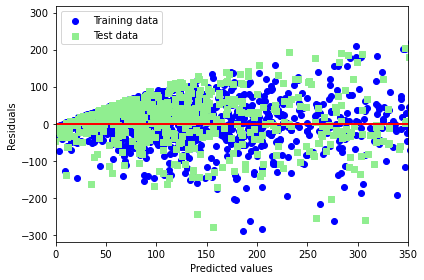

In [16]:
plt.scatter(
    y_train_pred,
    y_train_pred - y_train,
    c='blue',
    marker='o',
    label='Training data')
plt.scatter(
    y_test_pred,
    y_test_pred - y_test,
    c='lightgreen',
    marker='s',
    label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=350, lw=2, color='red')
plt.xlim([0, 350])
plt.tight_layout()
plt.show()

## Ramdon Forest Regressor

MSE train: 201.67, test: 1485.75
R^2 train: 0.99, test: 0.90


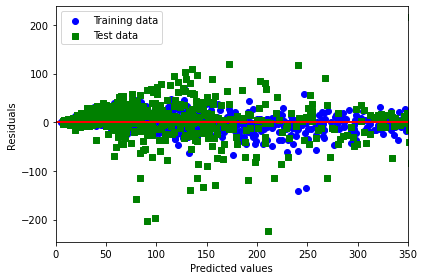

In [17]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

forest = RandomForestRegressor(
    n_estimators=1000, criterion='mse', random_state=1, n_jobs=-1)

forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print('MSE train: %.2f, test: %.2f' %
      (mean_squared_error(y_train, y_train_pred),
       mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.2f, test: %.2f' % (r2_score(y_train, y_train_pred),
                                       r2_score(y_test, y_test_pred)))

# Residual plot
plt.scatter(
    y_train_pred,
    y_train_pred - y_train,
    c='blue',
    marker='o',
    label='Training data')
plt.scatter(
    y_test_pred, y_test_pred - y_test, c='green', marker='s', label='Test data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin= 0, xmax=350, lw=2, color='red')
plt.xlim([0, 350])
plt.tight_layout()
plt.show()